## 1. Environment Setup and Data Loading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Environment setup complete.")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Environment setup complete.
Pandas version: 2.3.3
NumPy version: 2.0.2


In [2]:
# Load dataset
# Note: Update file path as needed for your local environment
data_path = '../data/AI4I_2020.csv'

try:
    df = pd.read_csv(data_path)
    print(f"✓ Dataset loaded successfully")
    print(f"✓ Shape: {df.shape[0]} rows × {df.shape[1]} columns")
except FileNotFoundError:
    print("Error: Dataset file not found. Please ensure AI4I_2020.csv is in the data/ directory.")
    print("Dataset can be downloaded from: https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset")

✓ Dataset loaded successfully
✓ Shape: 10000 rows × 14 columns


## 2. Initial Data Inspection

In [3]:
# Display first few rows
print("First 5 rows of dataset:")
df.head()

First 5 rows of dataset:


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
# Dataset structure
print("Dataset Information:")
print("="*60)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes:

In [5]:
# Column names and types
print("\nColumn Overview:")
print("="*60)
for idx, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    print(f"{idx:2d}. {col:30s} | {str(dtype):10s}")


Column Overview:
 1. UDI                            | int64     
 2. Product ID                     | object    
 3. Type                           | object    
 4. Air temperature [K]            | float64   
 5. Process temperature [K]        | float64   
 6. Rotational speed [rpm]         | int64     
 7. Torque [Nm]                    | float64   
 8. Tool wear [min]                | int64     
 9. Machine failure                | int64     
10. TWF                            | int64     
11. HDF                            | int64     
12. PWF                            | int64     
13. OSF                            | int64     
14. RNF                            | int64     


## 3. Data Completeness Assessment

In [6]:
# Check for missing values
print("Missing Values Assessment:")
print("="*60)
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

print(missing_summary.to_string(index=False))
print("\n" + "="*60)

total_missing = df.isnull().sum().sum()
if total_missing == 0:
    print("✓ RESULT: No missing values detected across all features")
else:
    print(f"⚠ WARNING: {total_missing} missing values detected")

Missing Values Assessment:
                 Column  Missing_Count  Missing_Percentage
                    UDI              0                 0.0
             Product ID              0                 0.0
                   Type              0                 0.0
    Air temperature [K]              0                 0.0
Process temperature [K]              0                 0.0
 Rotational speed [rpm]              0                 0.0
            Torque [Nm]              0                 0.0
        Tool wear [min]              0                 0.0
        Machine failure              0                 0.0
                    TWF              0                 0.0
                    HDF              0                 0.0
                    PWF              0                 0.0
                    OSF              0                 0.0
                    RNF              0                 0.0

✓ RESULT: No missing values detected across all features


In [7]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")
if duplicates == 0:
    print("✓ No duplicate records found")
else:
    print(f"⚠ {duplicates} duplicate rows identified")


Duplicate Rows: 0
✓ No duplicate records found


## 4. Descriptive Statistics

In [8]:
# Summary statistics for numerical features
print("Descriptive Statistics (Numerical Features):")
print("="*80)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].describe().round(2)

Descriptive Statistics (Numerical Features):


,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00,10000.0,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,300.0,310.01,1538.78,39.99,107.95,0.03,0.00,0.01,0.01,0.01,0.00
std,2886.90,2.0,1.48,179.28,9.97,63.65,0.18,0.07,0.11,0.10,0.10,0.04
min,1.00,295.3,305.70,1168.00,3.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2500.75,298.3,308.80,1423.00,33.20,53.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,5000.50,300.1,310.10,1503.00,40.10,108.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,7500.25,301.5,311.10,1612.00,46.80,162.00,0.00,0.00,0.00,0.00,0.00,0.00
max,10000.00,304.5,313.80,2886.00,76.60,253.00,1.00,1.00,1.00,1.00,1.00,1.00


In [9]:
# Categorical feature analysis
print("\nCategorical Feature: Type")
print("="*60)
type_distribution = df['Type'].value_counts()
print(type_distribution)
print(f"\nPercentage distribution:")
print((type_distribution / len(df) * 100).round(2))


Categorical Feature: Type
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

Percentage distribution:
Type
L    60.00
M    29.97
H    10.03
Name: count, dtype: float64


## 5. Class Distribution Analysis (Target Variable)

In [10]:
# Analyze machine failure distribution
print("Target Variable: Machine failure")
print("="*60)
failure_counts = df['Machine failure'].value_counts()
failure_pct = (failure_counts / len(df) * 100).round(2)

print(f"Normal operation (0): {failure_counts[0]:,} ({failure_pct[0]}%)")
print(f"Failure cases (1):    {failure_counts[1]:,} ({failure_pct[1]}%)")
print(f"\nImbalance Ratio: {failure_counts[0] / failure_counts[1]:.2f}:1")
print("\n⚠ NOTE: Severe class imbalance detected (96.61% vs 3.39%)")
print("   This must be addressed in downstream modeling tasks.")

Target Variable: Machine failure
Normal operation (0): 9,661 (96.61%)
Failure cases (1):    339 (3.39%)

Imbalance Ratio: 28.50:1

⚠ NOTE: Severe class imbalance detected (96.61% vs 3.39%)
   This must be addressed in downstream modeling tasks.


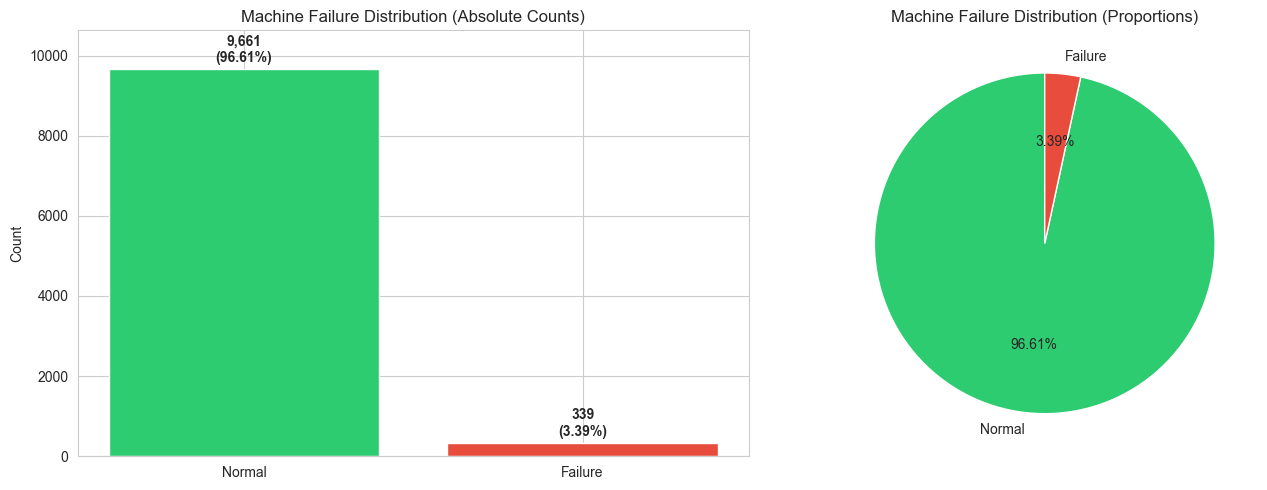

✓ Visualization saved to docs/class_distribution.png


In [11]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
axes[0].bar(['Normal', 'Failure'], failure_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_ylabel('Count')
axes[0].set_title('Machine Failure Distribution (Absolute Counts)')
axes[0].set_ylim(0, max(failure_counts.values) * 1.1)

# Add count labels
for i, v in enumerate(failure_counts.values):
    axes[0].text(i, v + 100, f'{v:,}\n({failure_pct.values[i]}%)', 
                ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie(failure_counts.values, labels=['Normal', 'Failure'], 
           autopct='%1.2f%%', colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Machine Failure Distribution (Proportions)')

plt.tight_layout()
plt.savefig('../docs/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved to docs/class_distribution.png")

## 6. Failure Mode Analysis

In [12]:
# Analyze specific failure modes
failure_modes = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_mode_names = {
    'TWF': 'Tool Wear Failure',
    'HDF': 'Heat Dissipation Failure',
    'PWF': 'Power Failure',
    'OSF': 'Overstrain Failure',
    'RNF': 'Random Failure'
}

print("Failure Mode Frequencies:")
print("="*60)
for mode in failure_modes:
    count = df[mode].sum()
    pct = (count / len(df) * 100)
    print(f"{failure_mode_names[mode]:30s}: {count:4d} ({pct:5.2f}%)")

print(f"\nTotal failure instances: {df[failure_modes].sum().sum()}")
print("(Note: Some failures may have multiple modes simultaneously)")

Failure Mode Frequencies:
Tool Wear Failure             :   46 ( 0.46%)
Heat Dissipation Failure      :  115 ( 1.15%)
Power Failure                 :   95 ( 0.95%)
Overstrain Failure            :   98 ( 0.98%)
Random Failure                :   19 ( 0.19%)

Total failure instances: 373
(Note: Some failures may have multiple modes simultaneously)


## 7. Outlier Detection

In [13]:
# IQR-based outlier detection for numerical features
def detect_outliers_iqr(df, column):
    """Detect outliers using Interquartile Range method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Select features for outlier analysis (exclude binary and categorical)
continuous_features = ['Air temperature [K]', 'Process temperature [K]', 
                      'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

print("Outlier Detection (IQR Method):")
print("="*80)
outlier_summary = []

for feature in continuous_features:
    outliers, lower, upper = detect_outliers_iqr(df, feature)
    outlier_count = len(outliers)
    outlier_pct = (outlier_count / len(df) * 100)
    
    outlier_summary.append({
        'Feature': feature,
        'Outlier_Count': outlier_count,
        'Percentage': f"{outlier_pct:.2f}%",
        'Lower_Bound': f"{lower:.2f}",
        'Upper_Bound': f"{upper:.2f}"
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))
print("\n" + "="*80)
print("⚠ CURATION DECISION: Outliers retained in curated dataset.")
print("   Rationale: Outliers may represent critical failure signatures.")
print("   Users should evaluate outliers in context of their specific use case.")

Outlier Detection (IQR Method):
                Feature  Outlier_Count Percentage Lower_Bound Upper_Bound
    Air temperature [K]              0      0.00%      293.50      306.30
Process temperature [K]              0      0.00%      305.35      314.55
 Rotational speed [rpm]            418      4.18%     1139.50     1895.50
            Torque [Nm]             69      0.69%       12.80       67.20
        Tool wear [min]              0      0.00%     -110.50      325.50

⚠ CURATION DECISION: Outliers retained in curated dataset.
   Rationale: Outliers may represent critical failure signatures.
   Users should evaluate outliers in context of their specific use case.


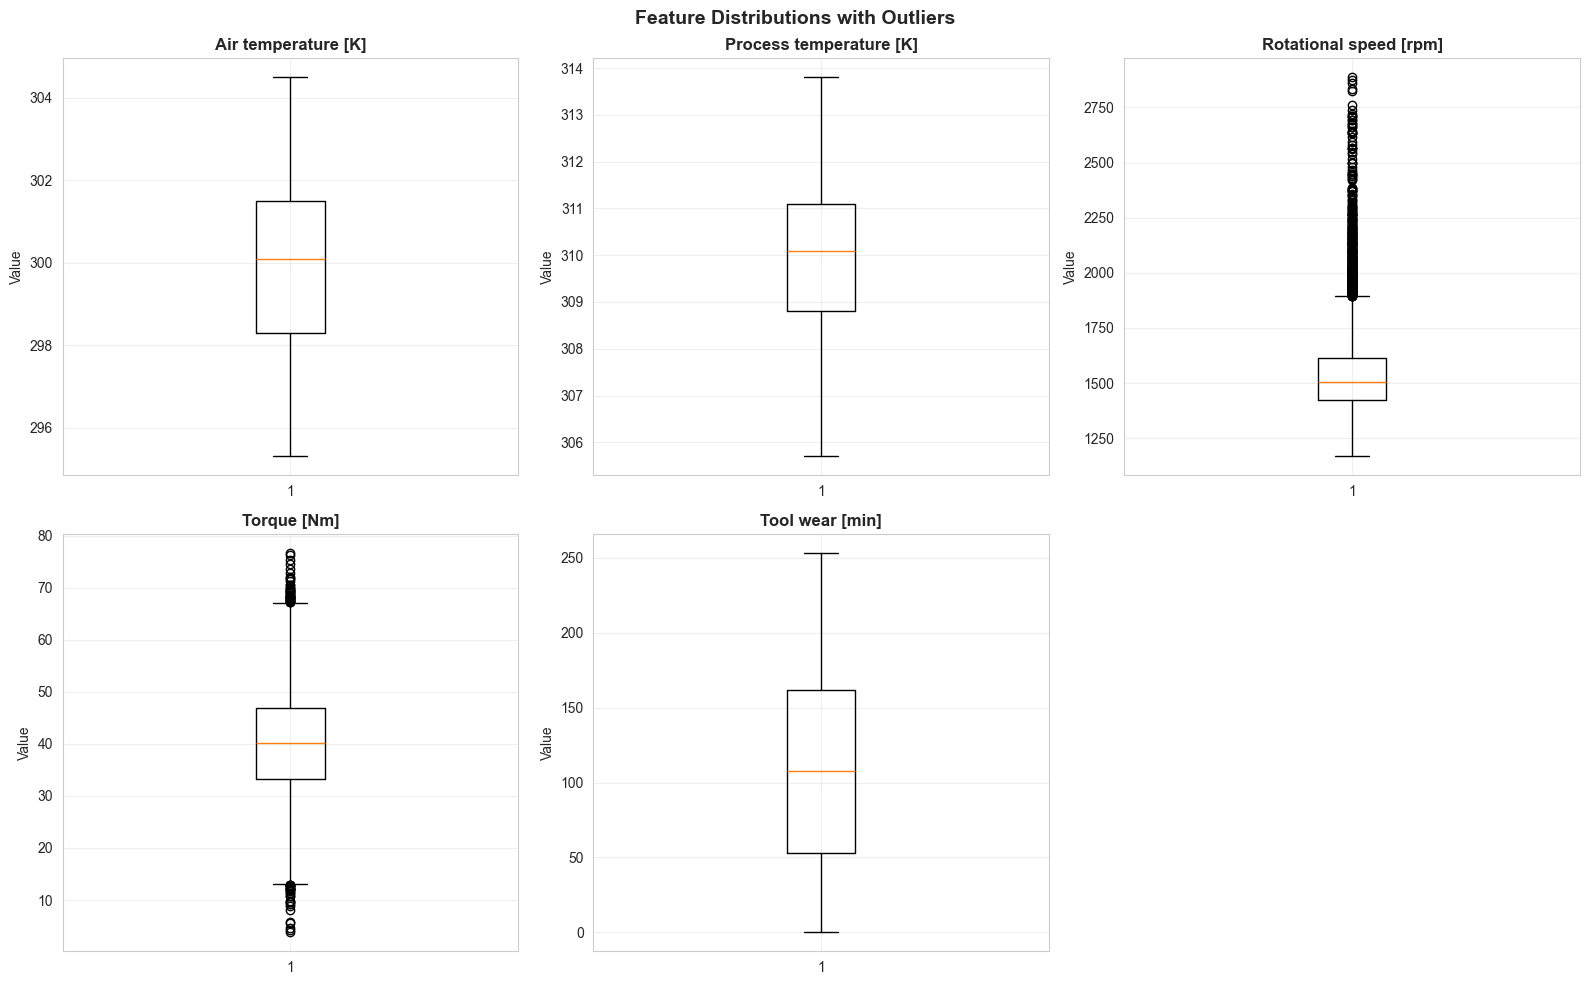

✓ Visualization saved to docs/outlier_analysis.png


In [14]:
# Visualize distributions with outliers
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(continuous_features):
    axes[idx].boxplot(df[feature], vert=True)
    axes[idx].set_title(feature, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[5])

plt.suptitle('Feature Distributions with Outliers', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../docs/outlier_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved to docs/outlier_analysis.png")

## 8. Feature Correlation Analysis

In [15]:
# Calculate correlation matrix for numerical features
correlation_features = continuous_features + ['Machine failure']
correlation_matrix = df[correlation_features].corr()

print("Feature Correlation Matrix:")
print("="*80)
print(correlation_matrix.round(3))

Feature Correlation Matrix:
                         Air temperature [K]  Process temperature [K]  \
Air temperature [K]                    1.000                    0.876   
Process temperature [K]                0.876                    1.000   
Rotational speed [rpm]                 0.023                    0.019   
Torque [Nm]                           -0.014                   -0.014   
Tool wear [min]                        0.014                    0.013   
Machine failure                        0.083                    0.036   

                         Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  \
Air temperature [K]                       0.023       -0.014            0.014   
Process temperature [K]                   0.019       -0.014            0.013   
Rotational speed [rpm]                    1.000       -0.875            0.000   
Torque [Nm]                              -0.875        1.000           -0.003   
Tool wear [min]                           0.000       -

In [16]:
# Identify strong correlations
print("\nStrong Correlations (|r| > 0.7):")
print("="*80)
strong_correlations = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            strong_correlations.append({
                'Feature_1': feature1,
                'Feature_2': feature2,
                'Correlation': f"{corr_value:.3f}"
            })

if strong_correlations:
    strong_corr_df = pd.DataFrame(strong_correlations)
    print(strong_corr_df.to_string(index=False))
    print("\n⚠ NOTE: High multicollinearity detected between temperature features.")
    print("   Consider feature selection or dimensionality reduction for modeling.")
else:
    print("No strong correlations (|r| > 0.7) detected.")


Strong Correlations (|r| > 0.7):
             Feature_1               Feature_2 Correlation
   Air temperature [K] Process temperature [K]       0.876
Rotational speed [rpm]             Torque [Nm]      -0.875

⚠ NOTE: High multicollinearity detected between temperature features.
   Consider feature selection or dimensionality reduction for modeling.


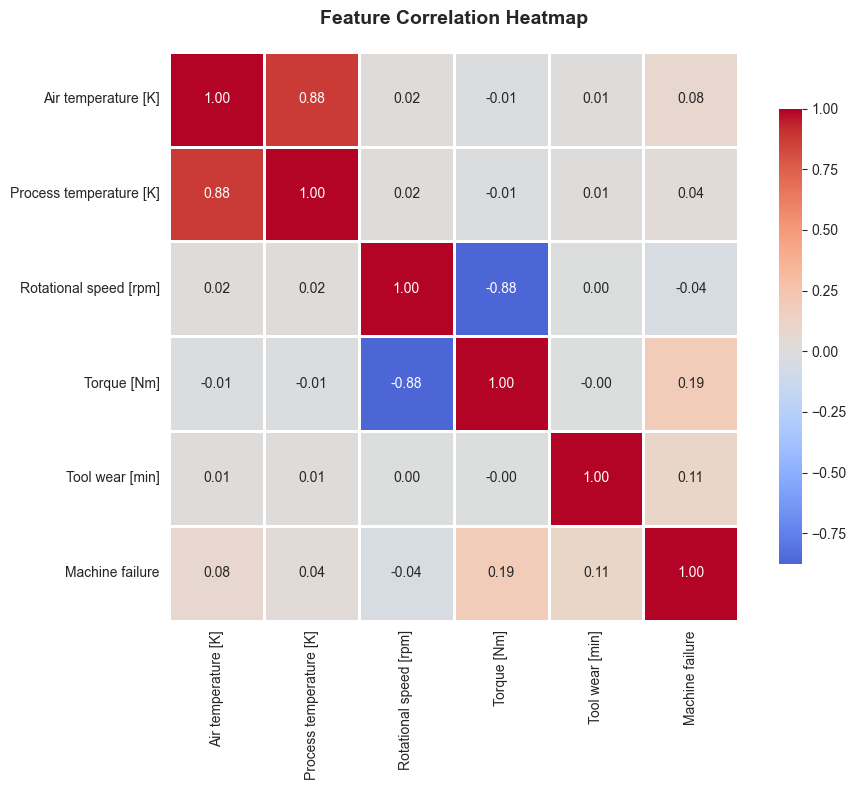

✓ Visualization saved to docs/correlation_heatmap.png


In [17]:
# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../docs/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved to docs/correlation_heatmap.png")

## 9. Feature Distribution Analysis

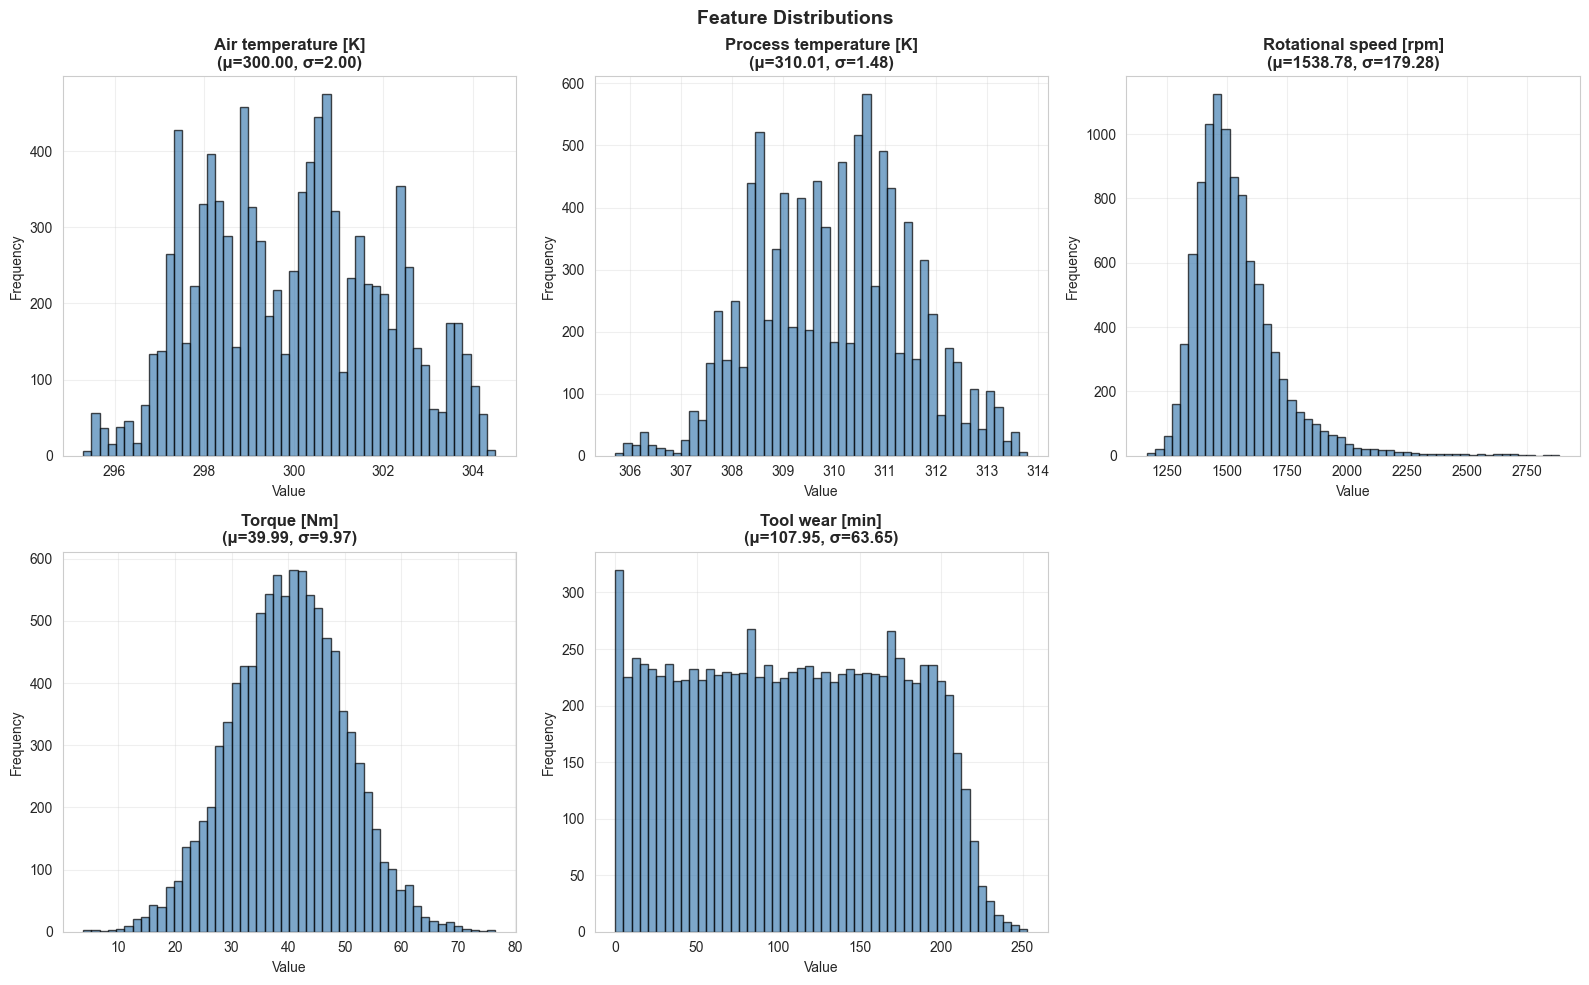

✓ Visualization saved to docs/feature_distributions.png


In [18]:
# Distribution plots for continuous features
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(continuous_features):
    axes[idx].hist(df[feature], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'{feature}\n(μ={df[feature].mean():.2f}, σ={df[feature].std():.2f})', 
                       fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[5])

plt.suptitle('Feature Distributions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../docs/feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved to docs/feature_distributions.png")

## 10. Feature Normalization (StandardScaler)

In [19]:
# Apply StandardScaler to continuous features
scaler = StandardScaler()
df_normalized = df.copy()

# Fit and transform
df_normalized[continuous_features] = scaler.fit_transform(df[continuous_features])

print("Feature Normalization (StandardScaler):")
print("="*80)
print("\nScaling Parameters:")
print("-" * 80)

scaling_params = pd.DataFrame({
    'Feature': continuous_features,
    'Mean': scaler.mean_.round(4),
    'Std_Dev': scaler.scale_.round(4)
})
print(scaling_params.to_string(index=False))

print("\n" + "="*80)
print("✓ Normalization complete. Scaling parameters saved for reproducibility.")

Feature Normalization (StandardScaler):

Scaling Parameters:
--------------------------------------------------------------------------------
                Feature      Mean  Std_Dev
    Air temperature [K]  300.0049   2.0002
Process temperature [K]  310.0056   1.4837
 Rotational speed [rpm] 1538.7761 179.2751
            Torque [Nm]   39.9869   9.9684
        Tool wear [min]  107.9510  63.6510

✓ Normalization complete. Scaling parameters saved for reproducibility.


In [20]:
# Verify normalization
print("\nPost-Normalization Statistics:")
print("="*80)
normalized_stats = df_normalized[continuous_features].describe().round(4)
print(normalized_stats.loc[['mean', 'std']])
print("\n✓ Verification: All features now have mean ≈ 0 and std ≈ 1")


Post-Normalization Statistics:
      Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
mean              -0.0000                  -0.0000                 -0.0000   
std                1.0001                   1.0001                  1.0001   

      Torque [Nm]  Tool wear [min]  
mean       0.0000           0.0000  
std        1.0001           1.0001  

✓ Verification: All features now have mean ≈ 0 and std ≈ 1


## 11. Data Quality Report Summary

In [21]:
# Generate comprehensive data quality summary
print("="*80)
print(" " * 20 + "DATA QUALITY ASSESSMENT SUMMARY")
print("="*80)

print("\n1. DATASET STRUCTURE")
print("-" * 80)
print(f"   • Total Records: {len(df):,}")
print(f"   • Total Features: {len(df.columns)}")
print(f"   • Numerical Features: {len(continuous_features)}")
print(f"   • Categorical Features: 1 (Type)")
print(f"   • Binary Target: 1 (Machine failure)")

print("\n2. DATA COMPLETENESS")
print("-" * 80)
print(f"   • Missing Values: {total_missing} (0.00%)")
print(f"   • Duplicate Records: {duplicates}")
print("   ✓ Assessment: Dataset is complete with no missing values")

print("\n3. CLASS DISTRIBUTION")
print("-" * 80)
print(f"   • Normal Operations: {failure_counts[0]:,} ({failure_pct[0]}%)")
print(f"   • Failure Cases: {failure_counts[1]:,} ({failure_pct[1]}%)")
print(f"   • Imbalance Ratio: {failure_counts[0] / failure_counts[1]:.2f}:1")
print("   ⚠ Assessment: Severe class imbalance requires mitigation strategies")

print("\n4. OUTLIER ANALYSIS")
print("-" * 80)
total_outliers = sum([x['Outlier_Count'] for x in outlier_summary])
print(f"   • Total Outliers Detected: {total_outliers}")
for item in outlier_summary:
    if item['Outlier_Count'] > 0:
        print(f"   • {item['Feature']}: {item['Outlier_Count']} ({item['Percentage']})")
print("   ✓ Decision: Outliers retained (may indicate failure signatures)")

print("\n5. FEATURE CORRELATIONS")
print("-" * 80)
if strong_correlations:
    print(f"   • Strong correlations detected: {len(strong_correlations)}")
    for corr in strong_correlations:
        print(f"   • {corr['Feature_1']} ↔ {corr['Feature_2']}: r = {corr['Correlation']}")
    print("   ⚠ Note: High multicollinearity between temperature features")
else:
    print("   ✓ No problematic multicollinearity detected")

print("\n6. DATA TRANSFORMATIONS APPLIED")
print("-" * 80)
print("   ✓ StandardScaler normalization (mean=0, std=1)")
print("   ✓ Scaling parameters documented for reproducibility")
print("   ✓ Original data structure preserved")

print("\n7. CURATION RECOMMENDATIONS")
print("-" * 80)
print("   1. Document class imbalance in metadata")
print("   2. Provide guidance on handling imbalanced data")
print("   3. Note multicollinearity for feature engineering")
print("   4. Retain outliers with documentation")
print("   5. Include scaling parameters in provenance")

print("\n8. DATASET QUALITY RATING")
print("-" * 80)
print("   Overall Quality: HIGH")
print("   • Completeness: ★★★★★ (No missing values)")
print("   • Consistency: ★★★★★ (All records valid)")
print("   • Balance: ★★☆☆☆ (Severe class imbalance)")
print("   • Documentation: ★★★★☆ (Adequate with curation)")

print("\n" + "="*80)
print(" " * 25 + "END OF QUALITY REPORT")
print("="*80)

                    DATA QUALITY ASSESSMENT SUMMARY

1. DATASET STRUCTURE
--------------------------------------------------------------------------------
   • Total Records: 10,000
   • Total Features: 14
   • Numerical Features: 5
   • Categorical Features: 1 (Type)
   • Binary Target: 1 (Machine failure)

2. DATA COMPLETENESS
--------------------------------------------------------------------------------
   • Missing Values: 0 (0.00%)
   • Duplicate Records: 0
   ✓ Assessment: Dataset is complete with no missing values

3. CLASS DISTRIBUTION
--------------------------------------------------------------------------------
   • Normal Operations: 9,661 (96.61%)
   • Failure Cases: 339 (3.39%)
   • Imbalance Ratio: 28.50:1
   ⚠ Assessment: Severe class imbalance requires mitigation strategies

4. OUTLIER ANALYSIS
--------------------------------------------------------------------------------
   • Total Outliers Detected: 487
   • Rotational speed [rpm]: 418 (4.18%)
   • Torque [Nm]: 

## 12. Export Data Quality Report

In [22]:
# Save quality metrics to file
quality_report = {
    'dataset_size': len(df),
    'num_features': len(df.columns),
    'missing_values': int(total_missing),
    'duplicate_records': int(duplicates),
    'class_distribution': {
        'normal': int(failure_counts[0]),
        'failure': int(failure_counts[1]),
        'imbalance_ratio': float(failure_counts[0] / failure_counts[1])
    },
    'outlier_summary': outlier_summary,
    'strong_correlations': strong_correlations,
    'scaling_parameters': {
        feat: {'mean': float(mean), 'std': float(std)} 
        for feat, mean, std in zip(continuous_features, scaler.mean_, scaler.scale_)
    },
    'quality_rating': {
        'completeness': 5,
        'consistency': 5,
        'balance': 2,
        'documentation': 4
    }
}

import json
with open('../metadata/quality_report.json', 'w') as f:
    json.dump(quality_report, f, indent=2)

print("✓ Data quality report saved to metadata/quality_report.json")

✓ Data quality report saved to metadata/quality_report.json
